# Sparse Logistic SVD: User Guide

## Setup

In [1]:
import slsvd
import numpy as np

print(slsvd.__version__)

0.1.0


In [2]:
import matplotlib.pyplot as plt

## Data Generation

In [3]:
from slsvd.data_generation import generate_data

In [4]:
bin_mat, loadings, scores, diagonal=generate_data(n=200, d=100, rank=2, random_seed=123)

In [5]:
bin_mat.shape

(200, 100)

In [6]:
loadings.shape

(100, 2)

In [7]:
scores.shape

(200, 2)

In [8]:
np.dot(loadings.T, loadings)

array([[1., 0.],
       [0., 1.]])

In [9]:
np.dot(scores.T, scores)

array([[195.4146256 ,   2.67535881],
       [  2.67535881, 200.14653178]])

In [10]:
np.count_nonzero(loadings, axis=0)

array([20, 20])

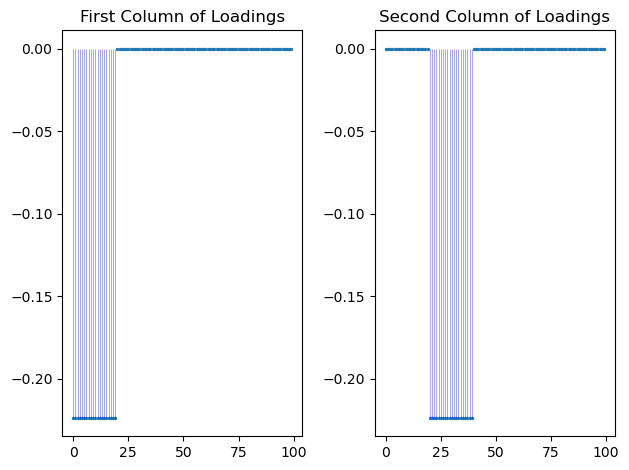

In [11]:
import matplotlib.pyplot as plt

# Plotting the first column
plt.subplot(1, 2, 1)
plt.scatter(range(len(loadings[:, 0])), loadings[:, 0], s=2)  # Adjust the size parameter
for i, val in enumerate(loadings[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5, linewidth=0.5)  # Adjust the line width
plt.title('First Column of Loadings')

# Plotting the second column
plt.subplot(1, 2, 2)
plt.scatter(range(len(loadings[:, 1])), loadings[:, 1], s=2)  # Adjust the size parameter
for i, val in enumerate(loadings[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5, linewidth=0.5)  # Adjust the line width
plt.title('Second Column of Loadings')

plt.tight_layout()
plt.show()


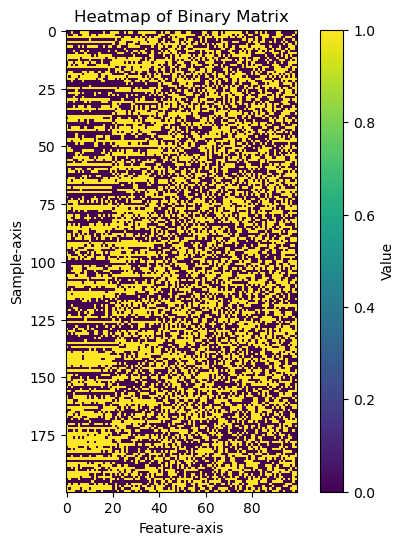

In [12]:
#import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(6, 6))
plt.imshow(bin_mat, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Value')
plt.title('Heatmap of Binary Matrix')
plt.xlabel('Feature-axis')
plt.ylabel('Sample-axis')
plt.show()

## Sparse Logistic SVD

In [13]:
from slsvd.slsvd import sparse_logistic_pca

In [14]:
from slsvd.sparse_logistic_pca import sparse_logistic_pca

In [15]:
from slsvd.sparse_logistic_pca import sparse_logistic_pca_coord

In [16]:
#mu, A, B, zeros, BIC, m, loss, lambdas = sparse_logistic_pca(bin_mat, lambda_val=0.1, k=2, procrustes=False, lasso=False)

In [17]:
bin_mat.shape

(200, 100)

In [18]:
mu0, A0, B0, zeros0, BICs0=sparse_logistic_pca_coord(bin_mat, lambdas=np.array([0]),k=2) 

In [19]:
zeros0

array([[100., 100.]])

In [20]:
np.mean(mu0)

0.052624279581212116

In [21]:
np.count_nonzero(B0,axis=0)

array([100, 100])

In [22]:
np.dot(B0.T, B0)

array([[ 1.        , -0.00859635],
       [-0.00859635,  1.        ]])

In [23]:
thelam=np.logspace(-2, 1, num=10)

In [24]:
thelam

array([ 0.01      ,  0.02154435,  0.04641589,  0.1       ,  0.21544347,
        0.46415888,  1.        ,  2.15443469,  4.64158883, 10.        ])

In [25]:
#thelam = np.array([4.64])

In [26]:
mu, A, B, zeros, BICs=sparse_logistic_pca_coord(bin_mat, lambdas=thelam,k=2) 

In [27]:
#mu, A, B, zeros, BIC, m, lambda_val= sparse_logistic_pca(bin_mat, lambda_val=0.01, k=2, procrustes=False, lasso=False)

In [28]:
zeros

array([[100., 100.],
       [100.,  99.],
       [100.,  96.],
       [ 99.,  95.],
       [ 97.,  90.],
       [ 85.,  80.],
       [ 69.,  67.],
       [ 39.,  39.],
       [ 21.,  21.],
       [ 20.,  15.]])

In [29]:
BICs

array([[26400.56093469, 25339.30763946],
       [26400.98393203, 25329.69269047],
       [26401.91833739, 25300.62667966],
       [26394.13015485, 25292.20974997],
       [26379.34274832, 25246.32328817],
       [26273.23816069, 25156.79176936],
       [26148.69882226, 25055.34497516],
       [25935.28116791, 24847.53997231],
       [25925.84775432, 24808.09766231],
       [26369.82061851, 25180.8269622 ]])

In [30]:
np.argmin(BICs[:, 0]),np.argmin(BICs[:, 1])

(8, 8)

In [31]:
zeros[np.argmin(BICs[:, 0]), 0], zeros[np.argmin(BICs[:, 1]), 1]

(21.0, 21.0)

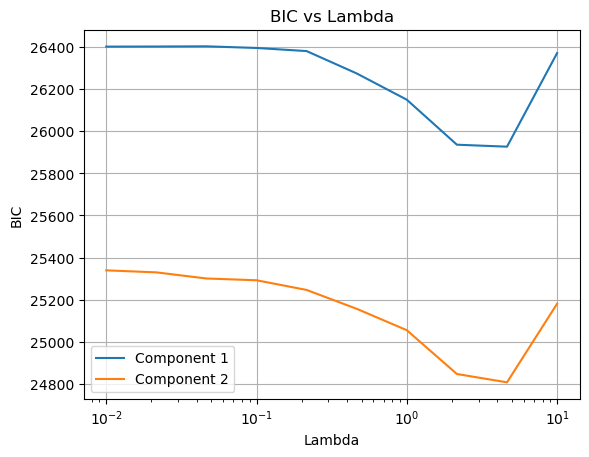

In [32]:
for i in range(BICs.shape[1]):
    plt.plot(thelam, BICs[:, i], label=f'Component {i+1}')

plt.xlabel('Lambda')
plt.ylabel('BIC')
plt.title('BIC vs Lambda')
plt.xscale('log')  # Log scale for better visualization
plt.legend()
plt.grid(True)
plt.show()

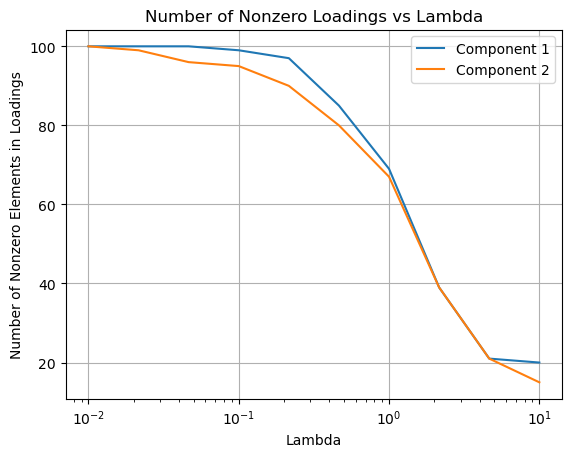

In [68]:
for i in range(zeros.shape[1]):
    plt.plot(thelam, zeros[:, i], label=f'Component {i+1}')

plt.xlabel('Lambda')
plt.ylabel('Number of Nonzero Elements in Loadings')
plt.title('Number of Nonzero Loadings vs Lambda')
plt.xscale('log')  # Log scale for better visualization
plt.legend()
plt.grid(True)
plt.show()

In [34]:
mu.shape

(100,)

In [35]:
np.mean(mu)

0.052624279581212116

In [36]:
A.shape

(200, 2)

In [37]:
B.shape

(100, 2)

In [38]:
np.count_nonzero(A, axis=0)

array([200, 200])

In [39]:
np.count_nonzero(B, axis=0)

array([21, 21])

In [40]:
np.dot(B.T, B)

array([[1.        , 0.00111067],
       [0.00111067, 1.        ]])

In [41]:
np.dot(A.T, A)

array([[7672.61634966,  277.23466856],
       [ 277.23466856, 3986.24113586]])

## Numerical Comparison

In [42]:
bin_mat_c = bin_mat - np.mean(bin_mat, axis=0)

# Step 2: Perform SVD on the centered matrix
U, S, Vt = np.linalg.svd(bin_mat_c, full_matrices=False)

In [43]:
Vt[:, :2].shape

(100, 2)

In [44]:
loadings.shape

(100, 2)

In [45]:
B.shape

(100, 2)

In [46]:
B0.shape

(100, 2)

In [47]:
from slsvd.metrics import mse, principle_angle, true_positive_rate, false_positive_rate

In [48]:
# def mse(X, Y):
#     tmp = np.linalg.norm(np.dot(X, X.T) - np.dot(Y, Y.T), ord='fro')**2
#     return tmp

In [49]:
# def principle_angle(X, B):
#     X = np.array(X)
#     B = np.array(B)
    
#     tmp = np.dot(X.T, B)
#     _, _, Vh = np.linalg.svd(tmp)
#     tmp1 = np.arccos(np.min(np.linalg.svd(tmp, compute_uv=False)))*(180/np.pi)
    
#     return tmp1

In [50]:
# def true_positive_rate(X, B):
#     X = np.array(X)
#     tmp = 0
#     for i in range(X.shape[0]):
#         for j in range(X.shape[1]):
#             if B[i,j] != 0 and X[i,j] != 0:
#                 tmp += 1
#     return tmp / np.count_nonzero(B)


# def false_positive_rate(X, B):
#     X = np.array(X)
#     tmp = 0
#     for i in range(X.shape[0]):
#         for j in range(X.shape[1]):
#             if B[i,j] == 0 and X[i,j] != 0:
#                 tmp += 1
#     return tmp / (X.shape[0] * X.shape[1] - np.count_nonzero(B))


### Comparison of Principle Angle

In [51]:
principle_angle(B, loadings),principle_angle(B0, loadings),principle_angle(Vt[:, :2], loadings)

(14.186741229793489, 19.456950594980345, 86.91505228482407)

### Comparison of TPR and FPR

In [52]:
true_positive_rate(B, loadings), false_positive_rate(B, loadings)

(1.0, 0.0125)

In [53]:
true_positive_rate(B0, loadings), false_positive_rate(B0, loadings)

(1.0, 1.0)

In [54]:
true_positive_rate(Vt[:, :2], loadings), false_positive_rate(Vt[:, :2], loadings)

(1.0, 1.0)

### Comparison of MSE

In [55]:
mse(B,loadings),mse(B0,loadings), mse(Vt[:, :2],loadings)

(0.12996466111226085, 0.30667356211958535, 3.982815504660171)

## Visualization

In [56]:
from sklearn.decomposition import PCA

### Visualization of PCA

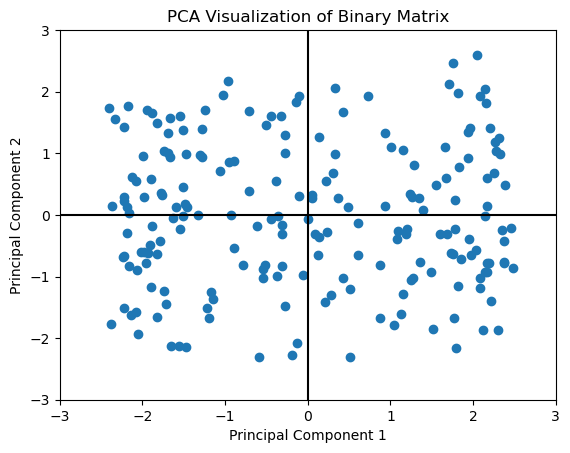

In [57]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(bin_mat)

# Visualize PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Visualization of Binary Matrix')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()

### SVD Visualization

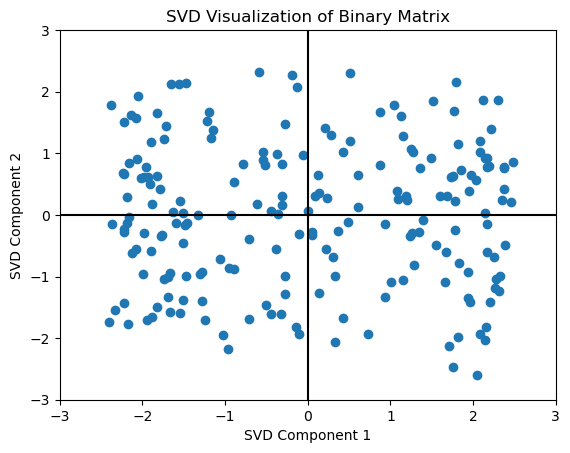

In [58]:
bin_mat_c = bin_mat - np.mean(bin_mat, axis=0)

# Step 2: Perform SVD on the centered matrix
U, S, Vt = np.linalg.svd(bin_mat_c, full_matrices=False)


# Take the first two components
svd_result = U[:, :2] * S[:2]

# Visualize SVD results
plt.scatter(svd_result[:, 0], svd_result[:, 1])
plt.title('SVD Visualization of Binary Matrix')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()

### Sparse Logistic SVD Visualization

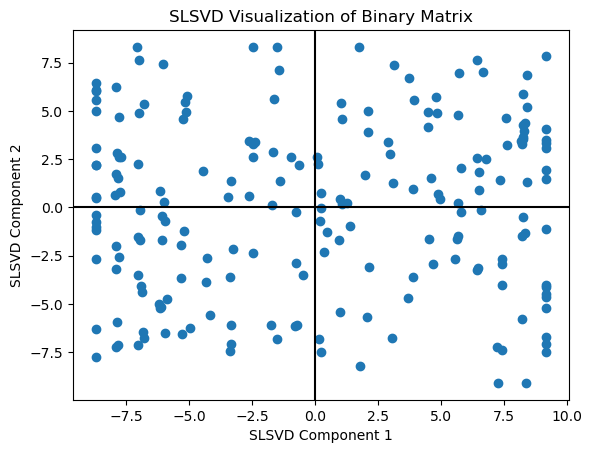

In [59]:
slsvd_result=A
plt.scatter(slsvd_result[:, 0], slsvd_result[:, 1])
plt.title('SLSVD Visualization of Binary Matrix')
plt.xlabel('SLSVD Component 1')
plt.ylabel('SLSVD Component 2')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.show()

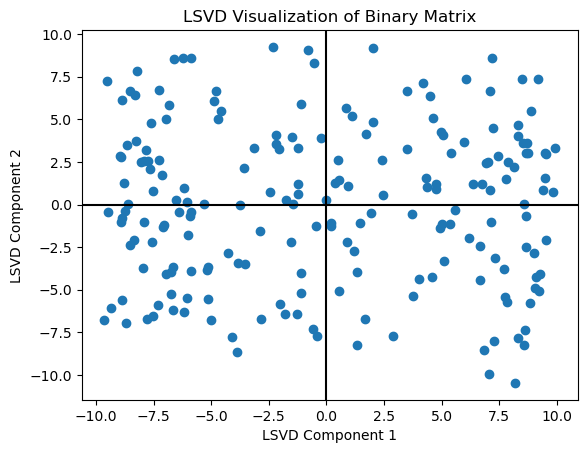

In [60]:
lsvd_result=A0
plt.scatter(lsvd_result[:, 0], lsvd_result[:, 1])
plt.title('LSVD Visualization of Binary Matrix')
plt.xlabel('LSVD Component 1')
plt.ylabel('LSVD Component 2')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.show()

### Visualization of SVD, LSVD and SLSVD

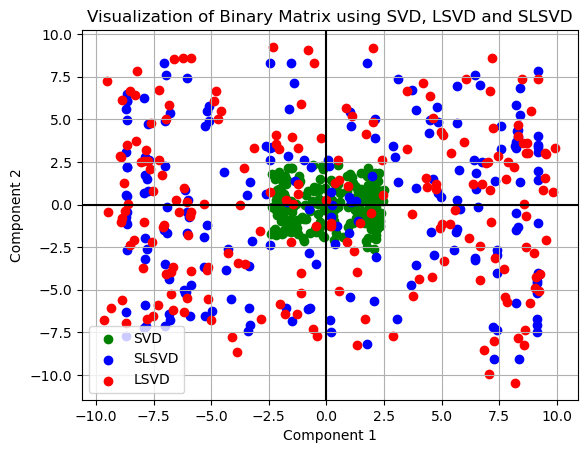

In [61]:
import matplotlib.pyplot as plt

# Assuming slsvd_result and lsvd_result are your data arrays

# Plotting SLSVD result
plt.scatter(svd_result[:, 0], svd_result[:, 1], color='green', label='SVD')

plt.scatter(slsvd_result[:, 0], slsvd_result[:, 1], color='blue', label='SLSVD')
# Plotting LSVD result
plt.scatter(lsvd_result[:, 0], lsvd_result[:, 1], color='red', label='LSVD')

plt.title('Visualization of Binary Matrix using SVD, LSVD and SLSVD')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')
plt.legend()
plt.grid(True)
plt.show()


### Visualization of Loadings

In [62]:
np.count_nonzero(loadings, axis=0)

array([20, 20])

In [63]:
np.count_nonzero(B, axis=0)

array([21, 21])

In [64]:
np.dot(loadings.T, loadings)

array([[1., 0.],
       [0., 1.]])

In [65]:
np.dot(B.T, B)

array([[1.        , 0.00111067],
       [0.00111067, 1.        ]])

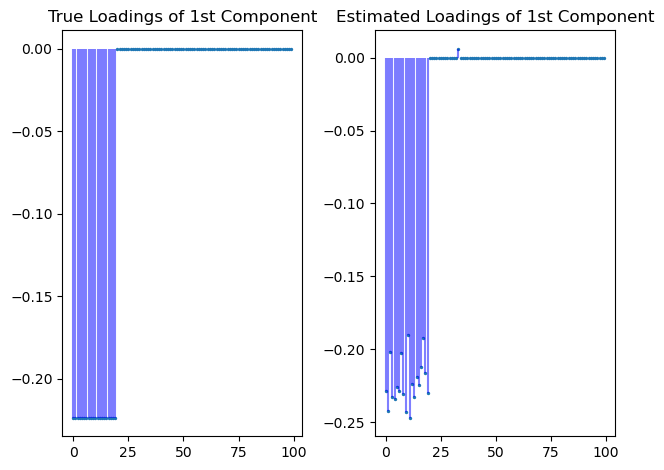

In [66]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(loadings[:, 0])), loadings[:, 0], s=2)
for i, val in enumerate(loadings[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('True Loadings of 1st Component')

# Plotting the second column
plt.subplot(1, 2, 2)
plt.scatter(range(len(loadings[:, 0])), B[:, 0], s=2)
for i, val in enumerate(B[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('Estimated Loadings of 1st Component')

plt.tight_layout()
plt.show()

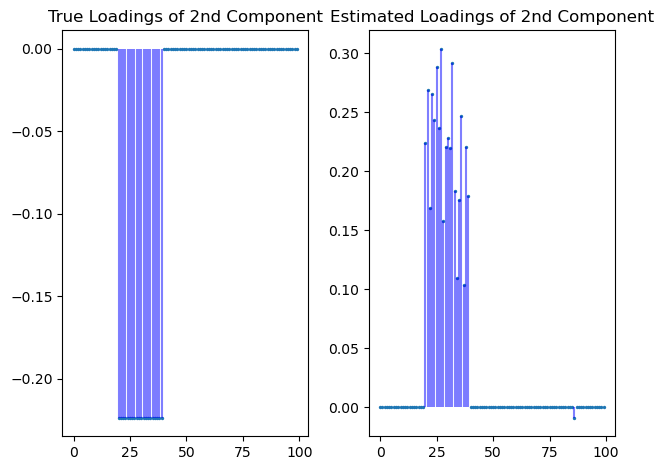

In [67]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(loadings[:, 1])), loadings[:, 1], s=2)
for i, val in enumerate(loadings[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('True Loadings of 2nd Component')

# Plotting the second column
plt.subplot(1, 2, 2)
plt.scatter(range(len(loadings[:, 1])), B[:, 1], s=2)
for i, val in enumerate(B[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('Estimated Loadings of 2nd Component')

plt.tight_layout()
plt.show()

# Reference

Lee, S., Huang, J. Z., & Hu, J. (2010). Sparse logistic principal components analysis for binary data. The Annals of Applied Statistics, 4(3), 1579.

Lee, S., & Huang, J. Z. (2013). A coordinate descent MM algorithm for fast computation of sparse logistic PCA. Computational Statistics & Data Analysis, 62, 26-38.
